In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #importing all the necessary libraries


In [2]:
train_data=pd.read_csv("sample_data/mnist_train_small.csv") #importing the training dataset
test_data=pd.read_csv("sample_data/mnist_test.csv")  #importing the test dataset

In [3]:
a=np.array(train_data) #creating array of the dataset

In [4]:
y=a[:,[0]] #creating a matrix of label data

In [5]:
x=a[:,1:785] #creating a matrix array of variable inputs


In [6]:
theta=np.zeros((784,1))   #generating a theta matrix

In [7]:
cost_count=[]   # a list which keeps track of cost after each iteration
iteration_count=[] # a list keeping track of number of iterations


#the main function of the model:here the the values x and y are provided as arguments.
#alpha=learning rate of the algorithm
#theta=value of theta to be optimized using gradient descent
#iterations=number of iterations
#m=number of training samples
def linear_regression(x,y,theta,alpha,iterations,m):   
  
  thetax=np.dot(x,theta)
  
  for i in range(0,iterations):
    
    theta=theta-(alpha/m)*(np.transpose(np.dot(np.transpose(np.subtract(thetax,y)),x))) #----gradient descent
    thetax=np.dot(x,theta) #calculating theta*x
    
    j=(1/(2*m))*(np.sum(np.subtract(thetax,y)**2)) #cost(mean squared error) at each iteration
    cost_count.append(j)  
    iteration_count.append(i)
    if(i%1000==0):
      print("cost after ",i," iterations:",j) 
  return(theta)

In [8]:
theta=linear_regression(x,y,theta,0.0000006,10000,20000) #setting optimum value of theta using model

cost after  0  iterations: 6.349874359874928
cost after  1000  iterations: 1.8928397289204248
cost after  2000  iterations: 1.8585334466717351
cost after  3000  iterations: 1.846011673358829
cost after  4000  iterations: 1.8395598521701042
cost after  5000  iterations: 1.8355440526985214
cost after  6000  iterations: 1.8327340588971646
cost after  7000  iterations: 1.830612794804204
cost after  8000  iterations: 1.8289273782205082
cost after  9000  iterations: 1.8275392414891707


Text(0, 0.5, 'Cost')

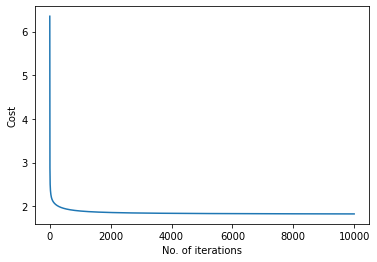

In [9]:
plt.plot(iteration_count,cost_count) #A plot of cost vs No of iterations to check the working of model(the cost is decreasing with each iteration)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")


In [10]:
test=np.array(test_data) #making array of test data

In [11]:
test_y=test[:,[0]] #actual label data
test_y.shape

(9999, 1)

In [12]:
test_x=test[:,1:785] 

In [16]:
predict=np.transpose(np.dot(np.transpose(theta),np.transpose(test_x))) #predicted labels using the predicted value of theta
for i in range(9999):
  predict[i,0]=round(predict[i,0]) #Since output is only ever a discrete value between 0 to 9 so we round off our predicted result

In [27]:
print("Actual value","Predicted value")
for i in range(10):
  print(test_y[i,0],int(predict[i,0])) #printed some of the actual values,

                    #Calculating accuracy
count=0 #keeping count of number of values that does not match
for i in range(9999):
   if(int(predict[i,0])!=test_y[i,0]):
    count+=1     #testing the model on test dataset using the predicted values of theta
accuracy=((10000-count)/10000)*100
print("Accuracy of the linear regression is:",accuracy,"%")

Actual value Predicted value
2 2
1 1
0 1
4 3
1 1
4 6
9 6
5 4
9 9
0 0
Accuracy of the linear regression is: 23.990000000000002 %
